In [1]:
pip install pyserial


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import sys
import csv
import time
from datetime import datetime
import serial

PORT = 'COM5'
BAUD = 9600

OUT_DIR = os.path.join(os.getcwd(), "week-2")
os.makedirs(OUT_DIR, exist_ok=True)

date_tag = datetime.now().strftime("%Y%m%d")
out_path = os.path.join(OUT_DIR, f"data_dht22_{date_tag}.csv")

def ts_now():
    return datetime.now().strftime("%Y%m%d%H%M%S")

def main():
    print(f"Opening serial {PORT} @ {BAUD} ...")
    try:
        ser = serial.Serial(PORT, BAUD, timeout=2)
    except serial.SerialException as e:
        print("ERROR opening serial port:", e)
        sys.exit(1)

    write_header = not os.path.exists(out_path)

    with open(out_path, "a", newline="") as f:
        writer = csv.writer(f)
        if write_header:
            writer.writerow(["timestamp", "temperature_c", "humidity"])

        print("Logging... Press Ctrl+C to stop.")
        try:
            while True:
                line = ser.readline().decode("utf-8", errors="ignore").strip()
                if not line:
                    continue

                parts = line.split(",")
                if len(parts) != 2:
                    continue

                try:
                    t = float(parts[0])
                    h = float(parts[1])
                except ValueError:
                    continue

                stamp = ts_now()
                writer.writerow([stamp, f"{t:.1f}", f"{h:.1f}"])
                f.flush()
                print(stamp, t, h)
        except KeyboardInterrupt:
            print("\nStopped by user.")
        finally:
            ser.close()
            print(f"Saved to: {out_path}")

if __name__ == "__main__":
    main()


Opening serial COM5 @ 9600 ...
Logging... Press Ctrl+C to stop.
20250813193018 17.8 58.0
20250813193048 17.7 58.2
20250813193118 17.7 58.3
20250813193148 17.7 58.4
20250813193218 17.7 58.5
20250813193248 17.7 58.5
20250813193318 17.7 58.7
20250813193348 17.6 58.6
20250813193418 17.6 58.7
20250813193448 17.6 58.7
20250813193518 17.6 58.8
20250813193548 17.6 58.9
20250813193618 17.5 58.9
20250813193648 17.5 59.0
20250813193718 17.5 59.1
20250813193748 17.5 59.1
20250813193818 17.5 59.1
20250813193848 17.5 59.2
20250813193918 17.5 59.2
20250813193948 17.5 59.3
20250813194018 17.5 59.3
20250813194048 17.5 59.3
20250813194118 17.4 59.4
20250813194148 17.4 59.4
20250813194218 17.4 59.4
20250813194248 17.4 59.4
20250813194318 17.4 59.5
20250813194348 17.4 59.5
20250813194418 17.4 59.5
20250813194448 17.4 59.5
20250813194518 17.4 59.5
20250813194548 17.4 59.6
20250813194618 17.4 59.6
20250813194648 17.4 59.6
20250813194718 17.4 59.6
20250813194748 17.4 59.6
20250813194818 17.4 59.6
20250813194

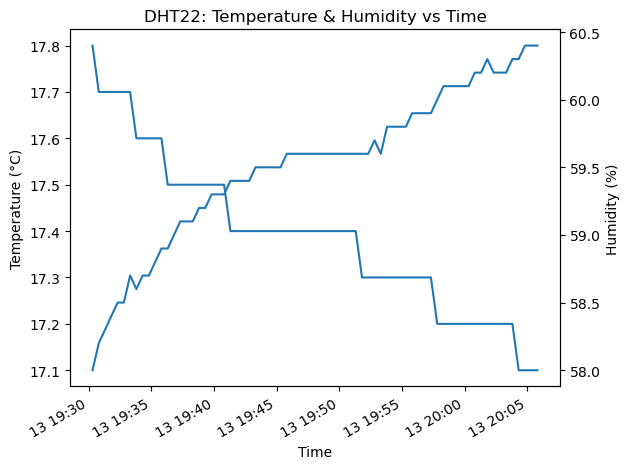

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

csv_path = os.path.join("week-2", "data_dht22_YYYYMMDD.csv".replace("YYYYMMDD","20250813"))

df = pd.read_csv(csv_path, dtype=str)
df = df.dropna()

df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H%M%S")

df["temperature_c"] = pd.to_numeric(df["temperature_c"], errors="coerce")
df["humidity"] = pd.to_numeric(df["humidity"], errors="coerce")
df = df.dropna(subset=["temperature_c","humidity"])

fig, ax1 = plt.subplots()
ax1.set_title("DHT22: Temperature & Humidity vs Time")
ax1.set_xlabel("Time")

ax1.set_ylabel("Temperature (°C)")
ax1.plot(df["timestamp"], df["temperature_c"])

ax2 = ax1.twinx()
ax2.set_ylabel("Humidity (%)")
ax2.plot(df["timestamp"], df["humidity"])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
